<a href="https://colab.research.google.com/github/elevien/math50/blob/main/hello_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd # for working with data
%config InlineBackend.figure_format = "svg"

# Introduction



**Reading**

Gleman, Hill and Vehtari - Chap. 1-5 (review as needed)
Gleman, Hill and Vehtari - Chap. 6, 7 and 8

 <!-- <a href = "https://www.bostonglobe.com/2020/06/11/opinion/statistical-paradox-police-killings/"> The statistical paradox of police killings </a> -->

**Due date**

 TBD



In In this notebook, we will learn how to implement a simple **linear regression**.  The basic idea of a linear regression (or really any regression model) is that we make some observation ${\bf y} = (y_1,y_2,\dots,y_N)^T$ of a **response variable** corresponding to another set of observation ${\bf x} = (x_1,\dots,x_N)^T$ of **predictor variables**. What we are interested in is the relaltionship between $x$ and $y$. The goal is often, but not always, to make predictions about the value of $y$ corresponding to some $x$ we did not measure.  

In order to make pregress, we need to assume something about the relationship between $x$ and $y$. Whatever assumptions we make constitute our **model**. For a linear regression model with one predictor variable, we will *assume* that the relationship between $x$ and $y$ is linear. For one predictor variable, this means $y = ax+b$ where $a$ and $b$ are our slope and intercept. However, it is never the case that the relationship is *exactly* linear, thus, we add some **noise**, denoted $\epsilon_i$, to our model to obtain:
\begin{equation}
y = ax + b + \epsilon
\end{equation}
Importantly, $a$ and $b$ are the same for every $x$ and $y$ point, but $\epsilon_i$ is different. We therefore need to decide how model this source of noise. It is common (but not always correct) to assume $\epsilon$ are independent and normaly distributed random variables for each $x$, with mean $0$ and variance $\sigma^2$. Sometimes we write this as 
\begin{equation}
\epsilon \sim N(0,\sigma).
\end{equation} We will discuss this assumption in greater detial throughout the course. For now, think of it as saying "for a given $x$ value the $y$ values are on average going to fall on a line $ax + b$, but with some variation around that.
  
NOTE: Sometimes people refer to $\epsilon$ as an error. This can be misleading. While there may be some **measurment error** which affects our observed values, the noise may also result from non-measurment error related randomness. 

The process of **fitting** the model to the data yields estimates of these paramater values $\hat{a}$, $\hat{b}$ and $\hat{\sigma}^2$ (we often use the $\hat{\cdot}$ to denote a fitted value). Once we have these values, we can make predictions using the fitted model: 
\begin{equation}
y = \hat{a}x + \hat{b} + \epsilon
\end{equation}
for values of $x$ that our not in our observed data set. 

In this section, we will answer the following questions:
* How do we estimate $\hat{a}$, $\hat{b}$ and 
$\hat{\sigma}^2$ from the data? We will mostly be doing this with a computer, but it's good to understand the theory (the equations) as well. 
* Once we fit the model, how do we quantify the uncertianty in our estimates of the paramaters? How do we quantify our uncertainty in the predictions we make from the model? 




# Performing a linear regression on fake data

 Whenever I learn a new statistical technique, I often like to start with fake, or simulated data. When we use simulated data, we know the growth truth and can therefore see exactly what aspects of the data the method can and cannot help us understand. Generating fake data also forces us to make our assumptions explicit. For now, let's generate fake data which obeys the assumptions of a linear regression (what are these assumptions?)




In [ ]:
# we already saw this in the first python notebook
# but here is a fake linear regression data
# (the reason we sort the x values is just to make plots 
# look nicer later on)
x = np.sort(np.random.normal(0,0.2,10))
a = 0.2  # the slope
b = 2. # the intercept
sigma = 0.1
y = a*x + b + np.random.normal(0,sigma,len(x)) 

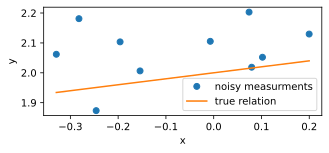

In [ ]:
fig,ax = plt.subplots(figsize=(5,2))
ax.plot(x,y,"o",label="noisy measurments")
ax.plot(x,a*x + b,"-",label="true relation")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

In [ ]:
# we will use the statsmodels package imported above to fit the linear regression 
# the command is sm.OLS(y, X), you can check out the help by typing help(sm.OLS)
# and you'll see there is a lot going on, the import thing is the parameters.
 
# We need to give OLS y, the observed or response variable, and x, the input variable. 
# but it likes the input to be in a matrix form where each row contains the numbers 
# that appear in front of the coefficents a,b
X = sm.add_constant(x)
X

array([[ 1.        , -0.32943176],
       [ 1.        , -0.28204631],
       [ 1.        , -0.24601305],
       [ 1.        , -0.19591236],
       [ 1.        , -0.1541408 ],
       [ 1.        , -0.00715705],
       [ 1.        ,  0.07403372],
       [ 1.        ,  0.07949419],
       [ 1.        ,  0.10209309],
       [ 1.        ,  0.19980931]])

In [ ]:
 # this first command creates the "model" object, which is all the information 
 # about the data and the statistical model (linear regression)
 # (compare this to r code in the textbook)
 model= sm.OLS(y,X) 
 # and this commend actually does the computations which give the results
results = model.fit()

NOTE: The function `OLS` uses maximum likelihood as described in Chapter 8 of the textbook. This is constrast to the Bayesian methods used in Chapter's 6 and 8. We will learn how to approach this problem from a Bayesian perspective later on, but for now, note that the results are slightly different. 

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                 -0.051
Method:                 Least Squares   F-statistic:                    0.5647
Date:                Thu, 12 Aug 2021   Prob (F-statistic):              0.474
Time:                        12:24:43   Log-Likelihood:                 10.195
No. Observations:                  10   AIC:                            -16.39
Df Residuals:                       8   BIC:                            -15.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0834      0.034     62.068      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


There is lot going on here, but the first thing to nose is the parameters ``cont`` (the intercept $b$) and ``x1`` (the slope $a$). The column ``std err`` displays the standard deviation of the estimates. These represent **confidence intervals** and roughly speaking, it means $90$% chance the  expect the "true" value to be with in $\pm$ $2\times$ ``std err`` of the esetimates coefficents. (Are the values in this interval for your regression coefficents?) 

We can get $a$ and $b$ using the params attribute of results:

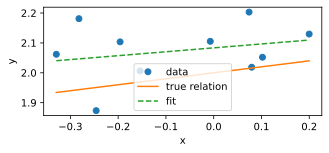

In [ ]:
b_fit,a_fit = results.params
# now let's plot it and compare to the data
fig,ax = plt.subplots(figsize=(5,2))
ax.plot(x,y,"o",label="data")
ax.plot(x,a*x + b,"-",label="true relation")
ax.plot(x,a_fit*x + b_fit,"--",label="fit")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

What about $\hat{\sigma}^2$? If we want to make predictions using the model, it is often important to include the noise. We obtain this as follows:

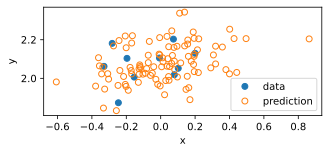

In [ ]:
# in the textbook they call this sigma and it is under "Auxilliary paramater(s)"
sigma_fit = np.sqrt(results.mse_resid)

fig,ax = plt.subplots(figsize=(5,2))
ax.plot(x,y,"o",label="data")

# now let's predict some new data points using the fitted model
# note this is different than 
x_pred =  np.random.normal(0,0.2,100)
y_pred = a_fit*x_pred + b_fit + np.random.normal(0,sigma_fit,len(x_pred))
ax.plot(x_pred,y_pred,"o",label="prediction",fillstyle="none")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

After fitting a regression model and obtaining the fitted coefficents, there are number of questions we can ask about the quality of the fit, and these often depend on exactly what we are using the results for. Often, we want to access how confident we are in the fitted model. This is often framed as: how likely is it that we would see these particular values of $a$ and $b$ by chance if the, for example, the $x$ and $y$ were not correlated? This question is addressed by $p$-values. 

We also often want to quantify how much of the variation is explained by the regression line. This is the role of the $R^2$ value. 

In [ ]:
results.rsquared

0.19197956679447148

**EXERCISES**

 
1.  Using the code above, write a function `simulated_data_lr(a,b,sigma,n)` which does the following: First, it generates data from a simulated linear regression with slope `a`, intercept `b`, measurment noise `sigma` and `n` data points. It then performs a linear regression on the simulated data and outputs the estimated slope, intercept, the $R^2$ value, the $p$-value and the F statistic. 
2. Using your function, make a plot of the p-value vs. n using the values of a, b and sigma from above. Make the same plot with $a = 0.1$. Now repeat this but plotting $R^2$ instead of the $p$-values.  Can you explain why the behavoir of these plots makes sense? What does this imply about 






In [ ]:
def sim(a,b,sigma,n):
  x = np.linspace(0,1,n)
  y = a*x + b + np.random.normal(0,sigma,len(x)) 
  model= sm.OLS(y,sm.add_constant(x)) 
 # and this commend actually does the computations which give the results
  results = model.fit() 
  return results.rsquared


In [ ]:
n_range = np.linspace(2,500,100,dtype=int)
rsquareds = [sim(0,1,0.5,n) for n in n_range]

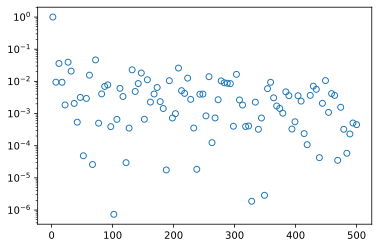

In [ ]:
n_range = np.linspace(2,500,100,dtype=int)
rsquareds = [sim(0,1,0.5,n) for n in n_range]

plt.semilogy(n_range,rsquareds,'o',fillstyle="none")

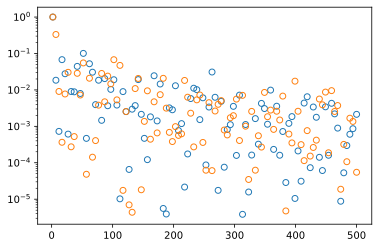

In [ ]:
n_range = np.linspace(2,500,100,dtype=int)
rsquareds = [sim(0,0.1,0.5,n) for n in n_range]
plt.semilogy(n_range,rsquareds,'o',fillstyle="none")

n_range = np.linspace(2,500,100,dtype=int)
rsquareds = [sim(0,1,0.5,n) for n in n_range]

plt.semilogy(n_range,rsquareds,'o',fillstyle="none")

# Example: Election and economy

In this example we will work with the elections and economy dataset from discussed in Chapter 7 of Gelman, Hill and Vehtari. The data set contains the incumbent party's vote share of US presdential elections from 1952 to 2012 along with a measure of economic growth. The idea is that one can do a surprisingly good job of forcasting elections solely based on the state of the economy during the previous presidents term.

In [ ]:
# we start by getting the data from one of the author websites
# we use pandas to read it into a DataFrame object, which is simply
# a nice way to store tabular data
url = "https://raw.githubusercontent.com/avehtari/ROS-Examples/master/ElectionsEconomy/data/hibbs.dat"
data = pd.read_csv(url,sep="\s+");

# here is what the data looks like
print(data)

    year  growth   vote inc_party_candidate other_candidate
0   1952    2.40  44.60           Stevenson      Eisenhower
1   1956    2.89  57.76          Eisenhower       Stevenson
2   1960    0.85  49.91               Nixon         Kennedy
3   1964    4.21  61.34             Johnson       Goldwater
4   1968    3.02  49.60            Humphrey           Nixon
5   1972    3.62  61.79               Nixon        McGovern
6   1976    1.08  48.95                Ford          Carter
7   1980   -0.39  44.70              Carter          Reagan
8   1984    3.86  59.17              Reagan         Mondale
9   1988    2.27  53.94           Bush, Sr.         Dukakis
10  1992    0.38  46.55           Bush, Sr.         Clinton
11  1996    1.04  54.74             Clinton            Dole
12  2000    2.36  50.27                Gore       Bush, Jr.
13  2004    1.72  51.24           Bush, Jr.           Kerry
14  2008    0.10  46.32              McCain           Obama
15  2012    0.95  52.00               Ob

Text(0, 0.5, 'vote share')

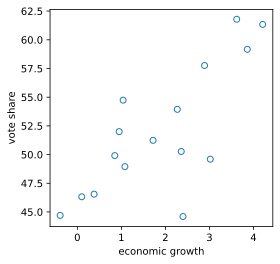

In [ ]:
# in this case our x variable is economic growth 
x = data.growth
y = data.vote

fig,ax = plt.subplots(figsize=(4,4))
ax.plot(x,y,"o",fillstyle="none")
ax.set_xlabel("economic growth")
ax.set_ylabel("vote share")

**EXERCISES**

1.  Perform a linear regression on vote share vs. economic growth. What is the equation you get for the regression line? (the fit will be slightly different than textbook, since they use Bayesian algorithms from the start.)
2. Suppose you wanted to predict the outcome of an election using this model. In order to be at least $90$% confident of your prediction, what would range would the economic growth have to fall in?  That is, you should provide a minumum value of $x$ needed to call the election of the incumbent and a maximum value needed to call the election for the non-incumbent. When answering this question, you should neglect any uncertainty in the fitted model (ignore the ``std err`` values).  
3. Generate simulated data to confirm your answer to the previous question. In other words, "simulate" elections for the values of economic growth you computed and show that indeed the incumbent/non-incumbent candidate wins in $90$% of them.  
4. Later we will see how to **propogate error** from the uncertainty in the measured coefficents. Without doing any math or coding, how do you think including this uncertainty would change the results?
5. In the previous example, we discussed we applied the linear regression in an idealized sceneario where the data satisfied exactly the assumptions of the linear model. In what ways might this data set violate the assumptions of the linear regression? To answer this question, think about how the $x$ and $y$ variabls are measured. 
<!-- 5. In this data, income is weighted measure of the income over the four years proceeding the election. You've already seen how to simulated a simple version of the model.  -->

# Example: Test scores and mother education



So far we have been working with regression problems where the predictor variables (x) are continous, that is, they are decimal numbers. It's comment however to make preditions based on discrete variables. For example, we might want to understand how the efficacy of a drug depends on the sex of a patient. Such variables are sometimes called **idicator variables**. Everything we've done actually generalizes very easily to this setting -- remember, there was nothing in our model that assumes $x$ is continous. 

To illusrate this, we will work with a data consisting of kids test scores and their mother's high school education (whether they graduated or not). Acutally, there is more information in this data set, but for now, we will only focus on this one variable. 

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/KidIQ/data/kidiq.csv")

In [ ]:
print(data)

     kid_score  mom_hs      mom_iq  mom_work  mom_age
0           65       1  121.117529         4       27
1           98       1   89.361882         4       25
2           85       1  115.443165         4       27
3           83       1   99.449639         3       25
4          115       1   92.745710         4       27
..         ...     ...         ...       ...      ...
429         94       0   84.877412         4       21
430         76       1   92.990392         4       23
431         50       0   94.859708         2       24
432         88       1   96.856624         2       21
433         70       1   91.253336         2       25

[434 rows x 5 columns]


In [ ]:
# there is more information here, but let's start by just looking at 
# how the mother's high school education correlates with scores
x = np.array(data["mom_hs"])
y = np.array(data["kid_score"])

model= sm.OLS(y,sm.add_constant(x)) 
 # and this commend actually does the computations which give the results
results = model.fit()

# as expected everything works just the same as before
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     25.69
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           5.96e-07
Time:                        20:22:37   Log-Likelihood:                -1911.8
No. Observations:                 434   AIC:                             3828.
Df Residuals:                     432   BIC:                             3836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.5484      2.059     37.670      0.0

Plotting this data is a little different than we are used to with continous predictors. If we just plot as usual, we get something that is a little difficult to interpret. Instead, we will use a boxplot. The boxplot takes a list of lists, and plots the mean and standard deviation of each element in this list. 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


[]

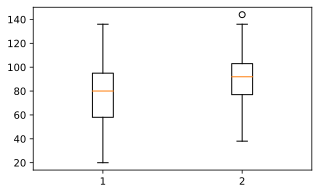

In [ ]:
fig,ax = plt.subplots(figsize=(5,3))
plt.boxplot([y[x ==0],y[x ==1]]);

b_fit,a_fit = results.params
plt.plot()

In [ ]:
results.rsquared

0.05612939624873492

**EXERCISES**
1. The model predicts that, on average, children of mothers who graduated high school will perform better on tests. But if we select a random child from a mother who graduated high school, how likely is it that they perform better than a random child from a mother who did not attend high school? Note we are asking about the model prediction, not the chance of this happening in the actual sampled data. 
2. Comment on (i) whether you believe there is a real effect of mother education on the kids test scores and (ii) the size of this effect. What role do the $R^2$ value and $p$-values play in your interpretation. 
<!-- 3. Write a function to generate fake data which looks like the test score data (just the test scores and mother high school idicator) and perform the regression. You will want to use the python function `np.random.choice` to generate the mother's high school eduation.  -->


# Example: Politicalization of COVID Vaccines


In [ ]:
data = pd.read_excel("https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-020-19057-5/MediaObjects/41467_2020_19057_MOESM3_ESM.xlsx")

In [ ]:
print(data)

        PID  Age Sex  ...         mig        IL4         IL8
0    106013   36   M  ...         NaN        NaN         NaN
1    108429   42   M  ...         NaN        NaN         NaN
2    111148   69   F  ...  331.193572  62.959853   42.384296
3    111148   69   F  ...  214.498376  62.017862   48.851175
4    121966   93   F  ...         NaN        NaN         NaN
..      ...  ...  ..  ...         ...        ...         ...
157  951931   39   M  ...  124.907747  60.747098   58.588559
158  960880   59   M  ...  285.934336  58.044882   74.289377
159  981247   30   F  ...         NaN        NaN         NaN
160  981247   30   F  ...   60.077891  60.662538   16.981702
161  985972   68   M  ...  300.575201  61.931712  171.967212

[162 rows x 63 columns]


In [ ]:
data.columns

Index(['PID', 'Age', 'Sex', 'Race_Ethnicity', 'O2_on_date', 'Sx_Onset_to_SC',
       'Use In 1st TP Analysis', 'NP_VL', 'OP_PBS_VL', 'OP_VTM_VL',
       'Sputum_VL', 'Plasma_VL', 'Urine_VL', 'Pregnancy', 'HTN',
       'Active_cancer ', 'CLD', 'Diabetes ', 'BMI', 'Comorbidity', 'CRP_draw',
       'Lym_draw', 'Ever_Remdesivir ', 'Days_between_SC_intubation',
       'Days_between_SC_Extubation', 'Days_between_SC_Discharge',
       'Days_between_SC_death', 'Death', 'fgf-basic', 'IL-1beta', 'gcsf',
       'il10', 'IL13', 'IL6', 'IL12', 'rantes', 'eotaxin', 'IL17a',
       'mip-1alpha', 'gmcsf', 'mip-1beta', 'mcp1', 'IL15', 'egf', 'IL5', 'hgf',
       'vegfa', 'IL1alpha', 'iFN gamma', 'IL17f', 'interferon alpha', 'IL9',
       'IL1ra', 'tnf alpha', 'IL-3', 'IL2', 'IL7', 'Ip10', 'IL-2r', 'IL22',
       'mig', 'IL4', 'IL8'],
      dtype='object')

In [ ]:
x = data["Death"].values
y = data["eotaxin"].values
y = y[x != "NaN"]
x = x[x != "NaN"]

TypeError: ignored

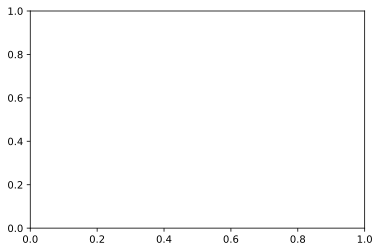

In [ ]:
plt.plot(x,y,"o")

In [ ]:
y

array([         nan,          nan, 133.07113301,  86.85868711,
                nan, 118.62958094,          nan,          nan,
        13.39020391,  35.98980763,  55.56982991,  32.95868359,
        58.51244263,  49.49744618, 101.69736004, 142.80424155,
        82.42752513,          nan,          nan,          nan,
        37.11440922,  40.00196556,          nan,          nan,
        57.54583584,  51.96688883,  79.96739739,  46.98349145,
                nan, 116.67131972,  59.71690709, 152.96177129,
        48.47730129,          nan,          nan,  44.42763619,
        38.17936278,  84.49855865,  78.59879305,          nan,
                nan,  87.96019007,  48.80926447,  66.4751931 ,
        99.15219282,          nan,          nan,          nan,
        42.14973885,          nan, 108.82929711, 133.6917893 ,
        40.59026349, 111.43742358,  84.79026294,          nan,
        24.74000486,  49.88088898,  25.24304261,  30.86731045,
                nan,  84.25719651,          nan,  68.43

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv")

In [ ]:
print(data)
data.columns

             date location  ...  daily_vaccinations_per_million  share_doses_used
0      2021-01-12  Alabama  ...                             NaN             0.207
1      2021-01-13  Alabama  ...                          1205.0             0.222
2      2021-01-14  Alabama  ...                          1445.0             0.212
3      2021-01-15  Alabama  ...                          1525.0             0.226
4      2021-01-16  Alabama  ...                          1529.0               NaN
...           ...      ...  ...                             ...               ...
13863  2021-08-08  Wyoming  ...                          1123.0             0.840
13864  2021-08-09  Wyoming  ...                          1125.0             0.840
13865  2021-08-10  Wyoming  ...                          1693.0             0.844
13866  2021-08-11  Wyoming  ...                          1894.0             0.845
13867  2021-08-12  Wyoming  ...                          2125.0             0.844

[13868 rows x 1

Index(['date', 'location', 'total_vaccinations', 'total_distributed',
       'people_vaccinated', 'people_fully_vaccinated_per_hundred',
       'total_vaccinations_per_hundred', 'people_fully_vaccinated',
       'people_vaccinated_per_hundred', 'distributed_per_hundred',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'daily_vaccinations_per_million', 'share_doses_used'],
      dtype='object')

In [ ]:
vote_data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vS3Z8Rq9xqOLISwoKdK0n6CFLBuPSCoXbbLeY8vhi-rzFS3ZFNEtR0BCdEbHcS-2Tlh5aPcnZbwBLao/pub?output=csv")

In [ ]:
vote_data

,state,called,final,dem_votes,rep_votes,other_votes,dem_percent,rep_percent,other_percent,dem_this_margin,margin_shift,vote_change,stateid,EV,X,Y,State_num,Center_X,Center_Y,Unnamed: 19,2016 Margin,Total 2016 Votes
0,U.S. Total,D,Yes,"81,282,916","74,223,369","2,891,441",51.3%,46.9%,1.8%,4.5%,2.4%,15.9%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020995,"136,639,848"
1,15 Key Battlegrounds,NaN,NaN,"31,908,248","33,002,287","950,354",48.4%,50.1%,1.4%,-1.7%,2.0%,17.2%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.036220,"56,209,173"
2,Non-Battlegrounds,NaN,NaN,"49,374,668","41,221,082","1,941,087",53.4%,44.5%,2.1%,8.8%,2.7%,15.1%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.060978,"80,430,331"
3,15 Key Battlegrounds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arizona,D,Yes,"1,672,143","1,661,686","53,497",49.4%,49.1%,1.6%,0.3%,3.9%,31.6%,AZ,11.0,2.0,2.0,4.0,205.0,374.0,NaN,-0.035456,"2,573,165"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Vermont,D,Yes,"242,820","112,704","11,904",66.1%,30.7%,3.2%,35.4%,9.0%,16.6%,VT,3.0,10.0,6.0,50.0,873.0,134.0,NaN,0.264084,"315,067"
57,Virginia,D,Yes,"2,413,568","1,962,430","84,526",54.1%,44.0%,1.9%,10.1%,4.8%,12.0%,VA,13.0,8.0,3.0,51.0,809.0,299.0,NaN,0.053212,"3,982,752"
58,Washington,D,Yes,"2,369,612","1,584,651","133,368",58.0%,38.8%,3.3%,19.2%,3.5%,21.5%,WA,12.0,1.0,5.0,53.0,128.0,58.0,NaN,0.157060,"3,365,644"
59,West Virginia,R,Yes,"235,984","545,382","13,286",29.7%,68.6%,1.7%,-38.9%,3.1%,11.4%,WV,5.0,7.0,3.0,54.0,765.0,284.0,NaN,-0.420727,"713,051"
